In [1]:
import sys
sys.path.append('..')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from typing import Sequence
import numpy as np
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error

In [2]:
exp_hydrogen = pd.read_csv('figures/figure4_pred_vs_act/experimental_results_all_hydrogen.csv').round(3)
exp_carbon = pd.read_csv('figures/figure4_pred_vs_act/experimental_results_all_carbon.csv').round(3)
simulate_hydrogen = pd.read_csv('figures/figure4_pred_vs_act/simulate_testing_hydrogen.csv').round(3)

simulate_carbon = pd.read_csv('figures/figure4_pred_vs_act/simulate_testing_carbon.csv').round(3)

In [3]:
def plot_shift(df, ax, i, j, set_title_name = '', sep = 5, xlab_name = '', ylab_name = '', 
               color = 'grey', groups = None, ms = 2, rmse = None, low_limit = 0, up_limit = 0, manual_tick = 0):
    acctual_shit_1 = df['1'].values
    predict_shit_1 = df['0'].values
#     low_limit = np.min([np.min(np.abs(acctual_shit_1)), np.min(np.abs(predict_shit_1))]) * 0.8
#     up_limit = np.max([np.max(np.abs(acctual_shit_1)), np.max(np.abs(predict_shit_1))]) * 1.1

    sns.set_theme()
    sns.set_style("whitegrid")
    x = np.linspace(low_limit, up_limit)
    ax[i, j].plot(x, x, color=color, alpha=0.25, zorder=0)
    
#     ax[i, j].scatter(acctual_shit_1, predict_shit_1, s = 20, label = 'A', linewidths=0, color=color)
#     for name, group in groups:
    
    ax[i, j].plot(predict_shit_1, acctual_shit_1, marker='o', linestyle='', ms=ms, color = color)
    
    ax[i, j].ticklabel_format(style="sci", scilimits=(-6, 6))
    ax[i, j].axis('square')
    
    ax[i, j].set_title(f'{set_title_name}', size = font_size)
    ax[i, j].set_ylim(low_limit, up_limit)
    ax[i, j].set_xlim(low_limit, up_limit)
#     ax[i, j].grid()
    grid_x_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    grid_y_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    
    print(low_limit, up_limit)
    ax[i, j].set_xlabel(xlab_name, loc="center", size = font_size)
    ax[i, j].set_ylabel(ylab_name, loc="center", size = font_size)
    
    ax[i, j].set_xticks(grid_x_ticks , minor=True)
    
    
    ax[i, j].set_yticks(grid_y_ticks , minor=True)
    
    ax[i, j].xaxis.set_tick_params(labelsize=ticksize)
    ax[i, j].yaxis.set_tick_params(labelsize=ticksize)
    
    ax[i, j].grid(which='both')

    ax[i, j].grid(which='minor', alpha=1, linestyle='-')
#     ax[i, j].legend(fontsize = 18, markerscale=3)
    ax[i, j].text(low_limit *1.2, up_limit * 0.9, str('$RMSD$=') + str(rmse), fontsize=12)
#     ax[i, j].set_xticklabels([item.get_text() for item in ax[i, j].get_xticklabels()], fontsize=12)
    print([item.get_text() for item in ax[i, j].get_xticklabels()], grid_x_ticks)
    print(low_limit)
    
    if manual_tick == 1:
        ax[i, j].set_xticks([1, 2, 3, 4, 5, 6], fontsize = 10)
        ax[i, j].set_xticklabels([1, 2, 3, 4, 5, 6], fontsize = 10)
        ax[i, j].xaxis.set_tick_params(labelsize=100)
        ax[i, j].set_yticks([1, 2, 3, 4, 5, 6])

In [4]:
rms_exp_c = mean_squared_error(exp_carbon['0'], exp_carbon['1'], squared=False).round(3)
rms_exp_h = mean_squared_error(exp_hydrogen['0'], exp_hydrogen['1'], squared=False).round(3)

rms_sim_c = mean_squared_error(simulate_carbon['0'], simulate_carbon['1'], squared=False).round(3)
rms_sim_h = mean_squared_error(simulate_hydrogen['0'], simulate_hydrogen['1'], squared=False).round(3)

12.8 198.00000000000003
['0', '50', '100', '150', '200'] [ 12.8   49.84  86.88 123.92 160.96]
12.8
0.1 7
['0', '1', '2', '3', '4', '5', '6', '7'] [0.1  1.48 2.86 4.24 5.62]
0.1
11.6653376 198.33000000000004
['0', '50', '100', '150', '200'] [ 11.6653376   48.99827008  86.33120256 123.66413504 160.99706752]
11.6653376
0.1 7
['0', '1', '2', '3', '4', '5', '6', '7'] [0.1  1.48 2.86 4.24 5.62]
0.1


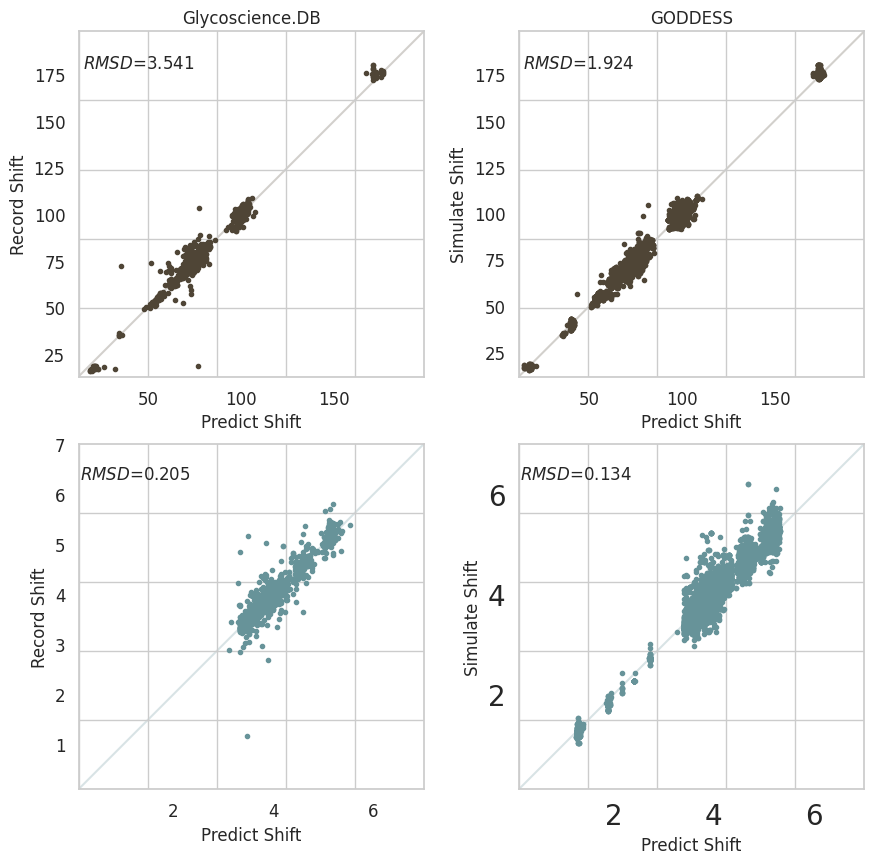

In [5]:

sns.set_theme(style="whitegrid", font_scale=1)
font_size = 12
ticksize = 12

ms = 3

figure, axis = plt.subplots(2, 2, figsize=(9, 9), constrained_layout=True)
# figure, axis = plt.subplots(1, 1, figsize=(12, 12), constrained_layout=False)
# figure, axis = plt.subplots(3, 3, figsize=(8, 8))
figure.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad = 2, w_pad = 1)


plot_shift(exp_carbon, axis, i = 0, j = 0, set_title_name = 'Glycoscience.DB', sep = 5, xlab_name = 'Predict Shift', 
           ylab_name = 'Record Shift', color = '#4F4536', ms = ms, rmse=rms_exp_c,
           low_limit = 12.8, up_limit = 198.00000000000003
          )

plot_shift(exp_hydrogen, axis, i = 1, j = 0, set_title_name = '', sep = 5, xlab_name = 'Predict Shift', 
           ylab_name = 'Record Shift', color = '#679399', ms = ms, rmse=rms_exp_h, 
          low_limit = 0.1, up_limit = 7)

plot_shift(simulate_carbon, axis, i = 0, j = 1, set_title_name = 'GODDESS', sep = 5, xlab_name = 'Predict Shift', 
           ylab_name = 'Simulate Shift', color = '#4F4536', ms = ms, rmse=rms_sim_c, 
           low_limit = 11.6653376, up_limit = 198.33000000000004)

plot_shift(simulate_hydrogen, axis, i = 1, j = 1, set_title_name = '' , sep = 5, xlab_name = 'Predict Shift', 
           ylab_name = 'Simulate Shift', color = '#679399', ms = ms, rmse=rms_sim_h, 
          low_limit = 0.1, up_limit = 7)

plt.tick_params(labelsize=20)
plt.show()

In [12]:
def plot_shift_v2(df, ax, i, set_title_name = '', sep = 5, xlab_name = '', ylab_name = '', 
               color = 'grey', groups = None, ms = 2, rmse = None, low_limit = 0, up_limit = 0, manual_tick = 0, 
                 title_x = None, title_y=None):
    acctual_shit_1 = df['1'].values
    predict_shit_1 = df['0'].values
#     low_limit = np.min([np.min(np.abs(acctual_shit_1)), np.min(np.abs(predict_shit_1))]) * 0.8
#     up_limit = np.max([np.max(np.abs(acctual_shit_1)), np.max(np.abs(predict_shit_1))]) * 1.1

    sns.set_theme()
    sns.set_style("whitegrid")
    x = np.linspace(low_limit, up_limit)
    ax[i].plot(x, x, color=color, alpha=0.25, zorder=0)
    
#     ax[i].scatter(acctual_shit_1, predict_shit_1, s = 20, label = 'A', linewidths=0, color=color)
#     for name, group in groups:
    
    ax[i].plot(predict_shit_1, acctual_shit_1, marker='o', linestyle='', ms=ms, color = color)
    
    ax[i].ticklabel_format(style="sci", scilimits=(-6, 6))
    ax[i].axis('square')
    
    ax[i].set_title(f'{set_title_name}', size = font_size, x = x_cor, y = y_cor)
    ax[i].set_ylim(low_limit, up_limit)
    ax[i].set_xlim(low_limit, up_limit)
#     ax[i].grid()
    grid_x_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    grid_y_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    
    print(low_limit, up_limit)
    ax[i].set_xlabel(xlab_name, loc="center", size = font_size)
    ax[i].set_ylabel(ylab_name, loc="center", size = font_size)
    
    ax[i].set_xticks(grid_x_ticks , minor=True)
    
    
    ax[i].set_yticks(grid_y_ticks , minor=True)
    
    ax[i].xaxis.set_tick_params(labelsize=ticksize)
    ax[i].yaxis.set_tick_params(labelsize=ticksize)
    
    ax[i].grid(which='both')

    ax[i].grid(which='minor', alpha=1, linestyle='-')
#     ax[i].legend(fontsize = 18, markerscale=3)
    ax[i].text(low_limit *1.2, up_limit * 0.9, str('$RMSE$=') + str(rmse), fontsize=20)
#     ax[i].set_xticklabels([item.get_text() for item in ax[i].get_xticklabels()], fontsize=12)
    print([item.get_text() for item in ax[i].get_xticklabels()], grid_x_ticks)
    print(low_limit)
    
    if manual_tick == 1:
        ax[i].set_xticks([1, 2, 3, 4, 5, 6])
        ax[i].set_xticklabels([1, 2, 3, 4, 5, 6])
#         ax[i].xaxis.set_tick_params(labelsize=100)
        ax[i].set_yticks([1, 2, 3, 4, 5, 6])

12.8 198.00000000000003
['0', '50', '100', '150', '200'] [ 12.8   49.84  86.88 123.92 160.96]
12.8
0.1 7
['0.0', '2.5', '5.0', '7.5'] [0.1  1.48 2.86 4.24 5.62]
0.1
11.6653376 198.33000000000004
['0', '50', '100', '150', '200'] [ 11.6653376   48.99827008  86.33120256 123.66413504 160.99706752]
11.6653376
0.1 7
['0.0', '2.5', '5.0', '7.5'] [0.1  1.48 2.86 4.24 5.62]
0.1


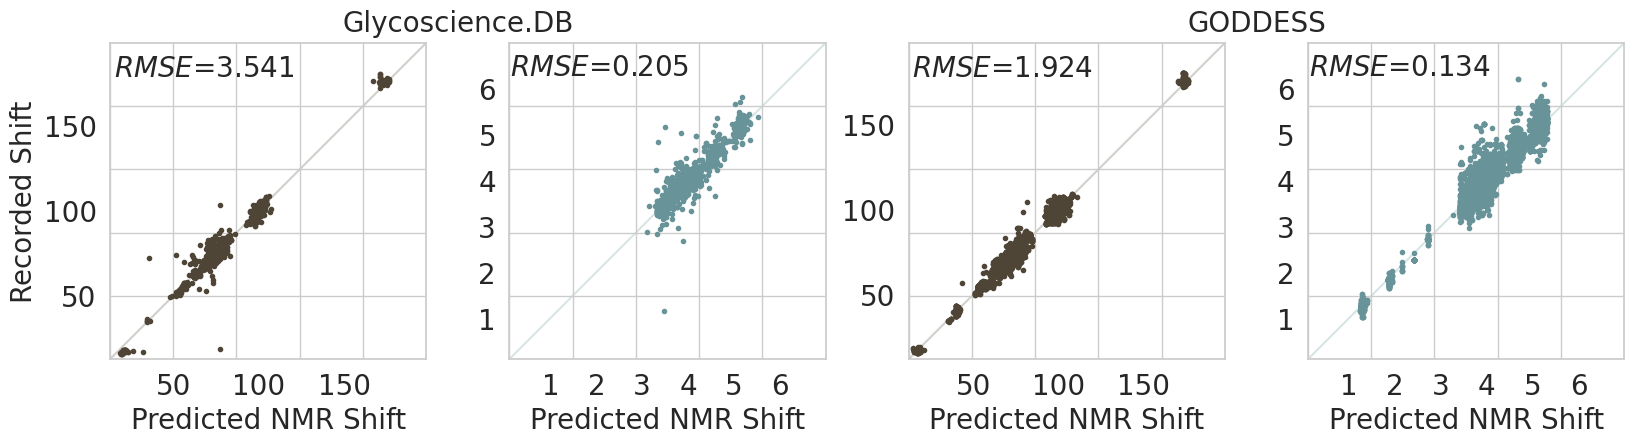

In [27]:

sns.set_theme(style="whitegrid", font_scale=1)
font_size = 20
ticksize = 20

ms = 3

figure, axis = plt.subplots(1, 4, figsize=(16, 9), constrained_layout=True)
# figure, axis = plt.subplots(1, 1, figsize=(12, 12), constrained_layout=False)
# figure, axis = plt.subplots(3, 3, figsize=(8, 8))
figure.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad = 1, w_pad = 2)

x_cor = 1.1
y_cor = 1.01

plot_shift_v2(exp_carbon, axis, i = 0, set_title_name = 'Glycoscience.DB', sep = 5, xlab_name = 'Predicted NMR Shift', 
           ylab_name = 'Recorded Shift', color = '#4F4536', ms = ms, rmse=rms_exp_c,
           low_limit = 12.8, up_limit = 198.00000000000003, title_x = x_cor, title_y=y_cor
          )

plot_shift_v2(exp_hydrogen, axis, i = 1, set_title_name = '', sep = 5, xlab_name = 'Predicted NMR Shift', 
           ylab_name = '', color = '#679399', ms = ms, rmse=rms_exp_h, 
          low_limit = 0.1, up_limit = 7, manual_tick = 1)

plot_shift_v2(simulate_carbon, axis, i = 2, set_title_name = 'GODDESS', sep = 5, xlab_name = 'Predicted NMR Shift', 
           ylab_name = '', color = '#4F4536', ms = ms, rmse=rms_sim_c, 
           low_limit = 11.6653376, up_limit = 198.33000000000004, title_x = x_cor, title_y=y_cor)

plot_shift_v2(simulate_hydrogen, axis, i = 3, set_title_name = '' , sep = 5, xlab_name = 'Predicted NMR Shift', 
           ylab_name = '', color = '#679399', ms = ms, rmse=rms_sim_h, 
          low_limit = 0.1, up_limit = 7, manual_tick = 1)

# plt.tick_params(labelsize=20)
plt.show()

In [8]:
simulate_hydrogen.min()

0    1.233
1    1.030
dtype: float64

In [9]:
simulate_hydrogen.max()

0    5.322
1    6.210
dtype: float64

In [11]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

im = Image.open("logo/GlycoNMR.png")
im = trim(im)


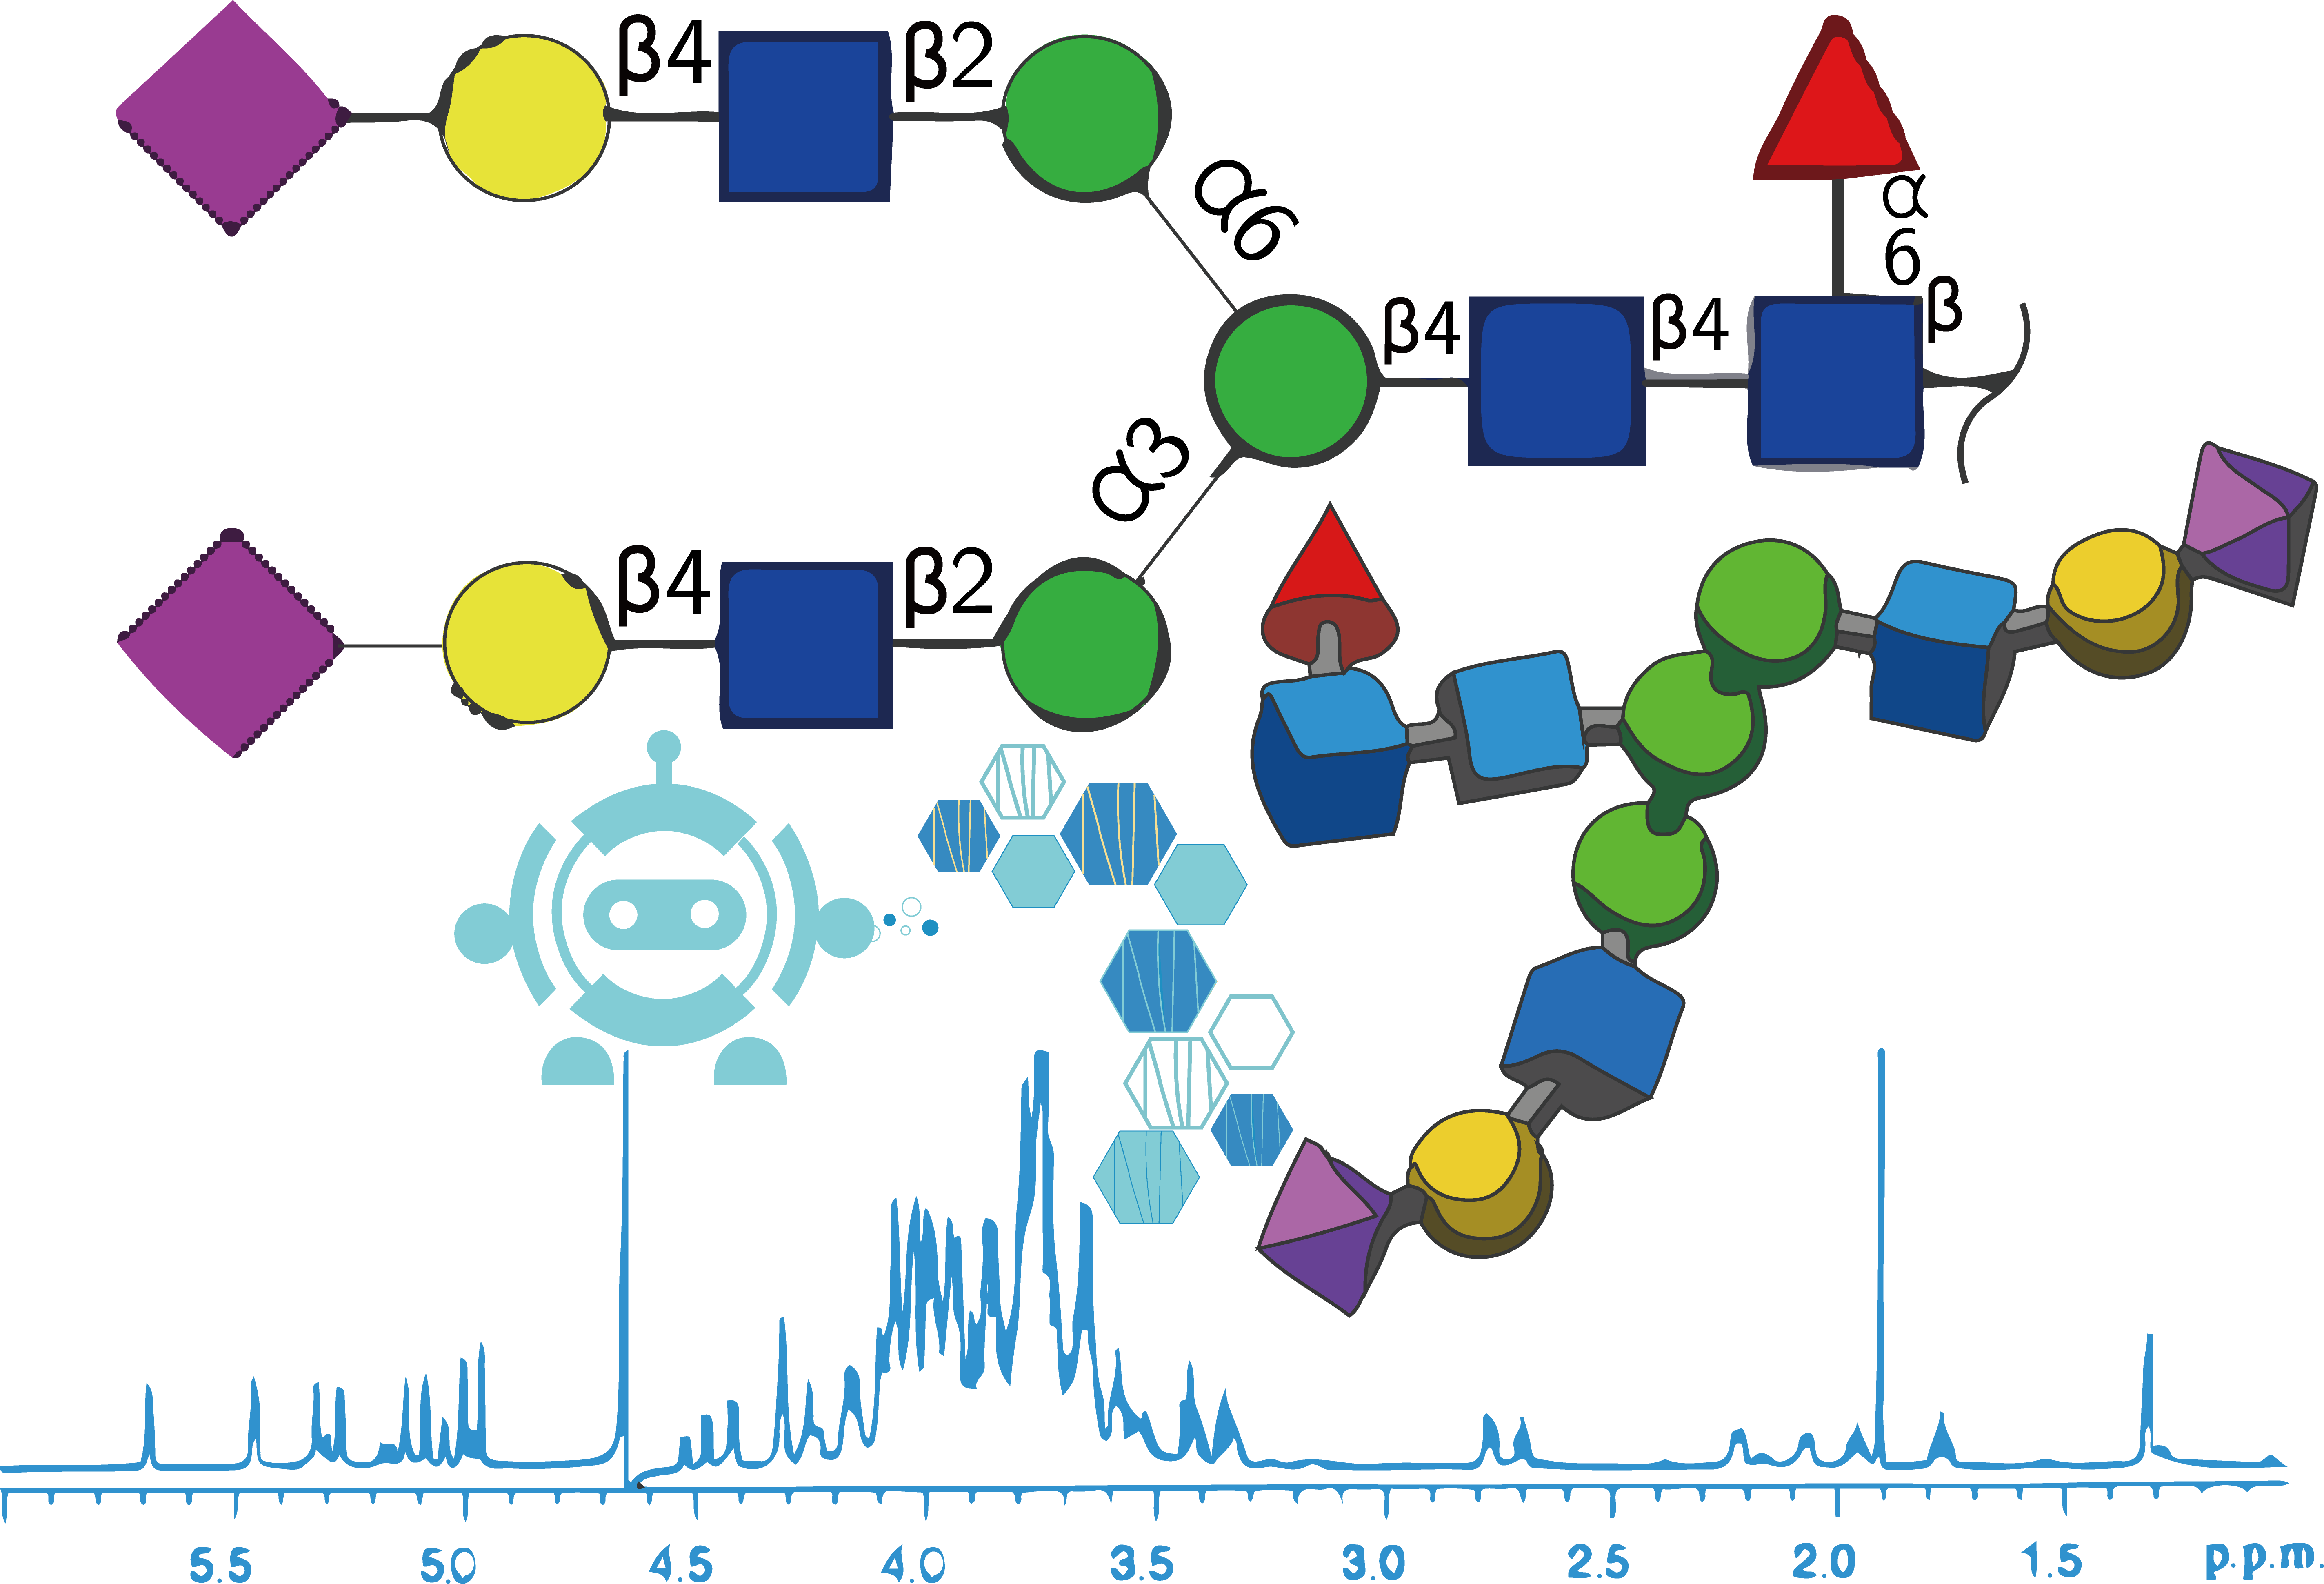

In [12]:
im